#### Dataset

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()

#print(f"ClassNames: {dataset.target_names}")
# print(f"DESCR:\n{dataset.DESCR}")

In [4]:
x = dataset.data
y = dataset.target

print(f"x-shape: {x.shape}")

x-shape: (569, 30)


#### PCA

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
scaler = StandardScaler() # ZUm Normalisieren der Daten
scaler.fit(x)

# StandardScaler.fit(x)
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
# print(f"x mean:\n{x_mean}")
# print(f"x std:\n{x_std}")

x_standardized = scaler.transform(x)
# print(x_standardized[0])

# StandardScaler.transform(x)
x_ = (x - x_mean) / x_std
# print(x_[0])

In [7]:
n_components = 15
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_standardized)
x_pca = pca.transform(x_standardized)

In [8]:
# print(f"Components:\n{pca.components_}")
# print(f"Explained Variance:\n{pca.explained_variance_}")
# print(f"Explained Variance Ratio:\n{pca.explained_variance_ratio_}")
# print(f"Sum of Exmplained Variance Ratio:\n{sum(pca.explained_variance_ratio_)}")

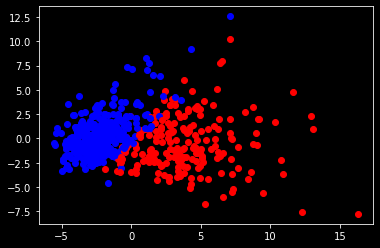

In [9]:
colors = ["red", "blue"]
for index, point in enumerate(x_pca):
    plt.scatter(point[0], point[1], color=colors[y[index]])
plt.show()

# Aufgabe 1

Finde die Anzahl an Dimensionen, um 90% der Varianz "zu erklären"

In [10]:
for n_components in range (1, len(x[1])+1):
    pca = PCA(n_components = n_components, copy=True)
    pca.fit(x_standardized)
    x_pca = pca.transform(x_standardized)

    if sum(pca.explained_variance_ratio_) >= 0.90:
        print(f"n_components: {n_components}")
        # print(f"Components:\n{pca.components_}")
        print(f"Explained Variance: {sum(pca.explained_variance_ratio_)}")
        break

# Man kann die for-Schleife auch umgehen bzw. die 90% direkt angeben:
pca = PCA(n_components = 0.90)
pca.fit(x_standardized)
explained_var_ratio = sum(pca.explained_variance_ratio_)
print(f"Explained Variance: {sum(pca.explained_variance_ratio_)} with n_components: {n_components}")

n_components: 7
Explained Variance: 0.9100953006940762
Explained Variance: 0.9100953006967308 with n_components: 7


# Aufgabe 2

Wende das gefundene Setup auf die Daten an

In [11]:
x_pca = pca.transform(x_standardized)

# Aufgabe 3

Split das Dataset in ein Train and Testset

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30)

# Aufgabe 4

Wende den KNN-Classifier auf den transformierten Daten an.  
Du kannst dabei auch mit einer For-Schleife die optimale Anzahl an Nachbarn bestimmen.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

best_score = 0.0
for n_neighbor in range(1, 11):
    clf = KNeighborsClassifier(
        n_neighbors=n_neighbor
    )
    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test, y_test)

    if accuracy > best_score:
        best_score = accuracy
        print(f"Neighbors: {n_neighbor}, Score: {accuracy:.4}")

1
Neighbors: 1, Score: 0.9357
2
3
Neighbors: 3, Score: 0.9474
4
Neighbors: 4, Score: 0.9591
5
6
7
8
9
10


# Aufgabe 5

Wende den KNN-Classifier auf den Standardisierten (aber nicht PCA transofrmierten) Daten an.  
Teste auch hier wieder, welche Anzahl an Nachbarn optimal ist.  
Was für Performance-Unterschiede sind zu beobachten?

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.30)

best_score = 0.0
for n_neighbor in range(1, 10+1):
    clf = KNeighborsClassifier(
        n_neighbors=n_neighbor
    )
    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test, y_test)

    if accuracy > best_score:
        best_score = accuracy
        print(f"Neighbors: {n_neighbor}, Score: {accuracy:.4}")

Neighbors: 1, Score: 0.9357
Neighbors: 3, Score: 0.9474
Neighbors: 4, Score: 0.9591
